### 사회연결망 분석하기

In [1]:
install.packages(c("tidygraph", "ggraph"))
library(tidygraph)
library(ggraph)

package 'tidygraph' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidygraph'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Anaconda3\Lib\R\library\00LOCK\tidygraph\libs\x64\tidygraph.dll를 C:\Anaconda3\Lib\R\library\tidygraph\libs\x64\tidygraph.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'tidygraph'"

package 'ggraph' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ggraph'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Anaconda3\Lib\R\library\00LOCK\ggraph\libs\x64\ggraph.dll를 C:\Anaconda3\Lib\R\library\ggraph\libs\x64\ggraph.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'ggraph'"


The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\RtmpMR6lBJ\downloaded_packages


Warning message:
"package 'tidygraph' was built under R version 3.6.3"
Attaching package: 'tidygraph'

The following object is masked from 'package:stats':

    filter

Warning message:
"package 'ggraph' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


##### 아이유와 1년동안 공동작업한 뮤지션과 연관성분석

In [2]:
feat <- read.csv('../data/R/featuring.csv')
feat
class(feat)

from,to
아이유,G-DRAGON
에픽하이,아이유
에픽하이,오혁
아이유,오혁
HIGH4,아이유
에픽하이,MINO
에픽하이,사이먼 도미닉
에픽하이,더콰이엇
에픽하이,수현
MINO,사이먼 도미닉


[1] "data.frame"

In [3]:
# 사회연결망(SNA Social Network Association)을 진행하려면 df을 그래프형식 변환해야 한다.
# tidygraph의 as_tbl_graph()함수를 이용해서 시각화를 진행
fg <- as_tbl_graph(feat)
fg
class(fg)

# A tbl_graph: 9 nodes and 12 edges
#
# A directed acyclic simple graph with 1 component
#
# Node Data: 9 x 1 (active)
  name         
  <chr>        
1 아이유       
2 에픽하이     
3 HIGH4        
4 MINO         
5 사이먼 도미닉
6 G-DRAGON     
# ... with 3 more rows
#
# Edge Data: 12 x 2
   from    to
  <int> <int>
1     1     6
2     2     1
3     2     7
# ... with 9 more rows

[1] "tbl_graph" "igraph"

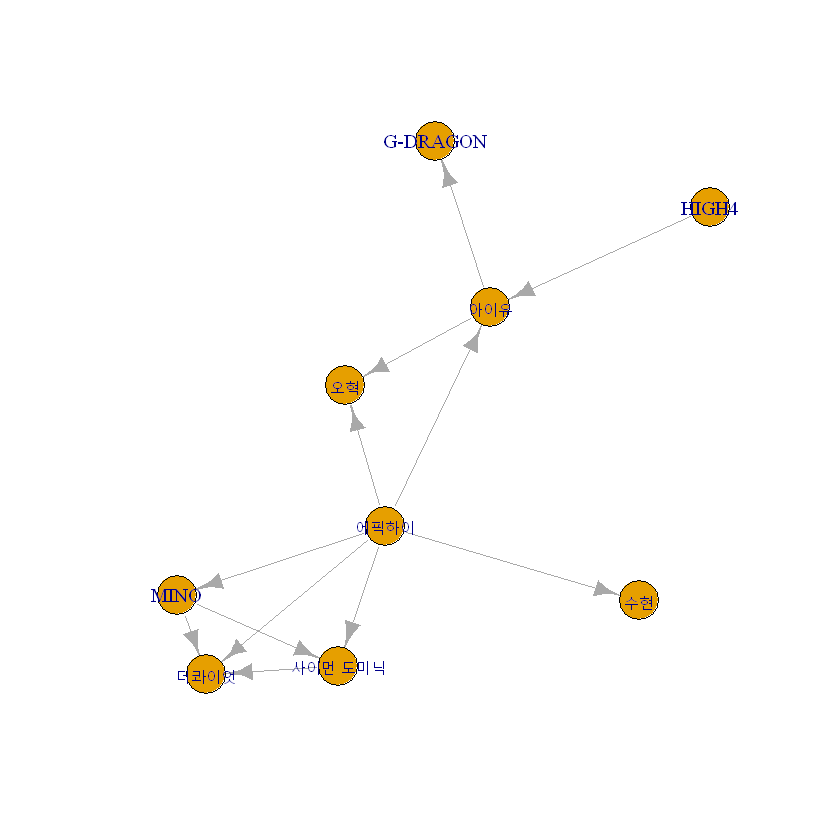

In [4]:
# 연결망시각화(R의 기본 plot)
plot(fg)

Using `sugiyama` as default layout


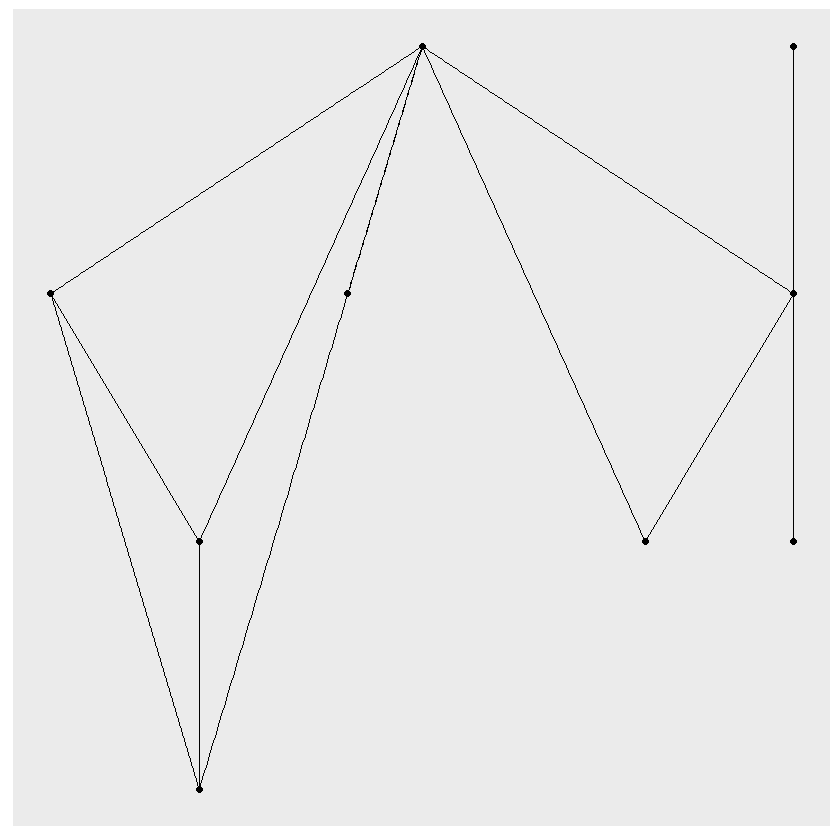

In [7]:
# ggplot2
ggraph(fg) + geom_node_point() + geom_edge_link()

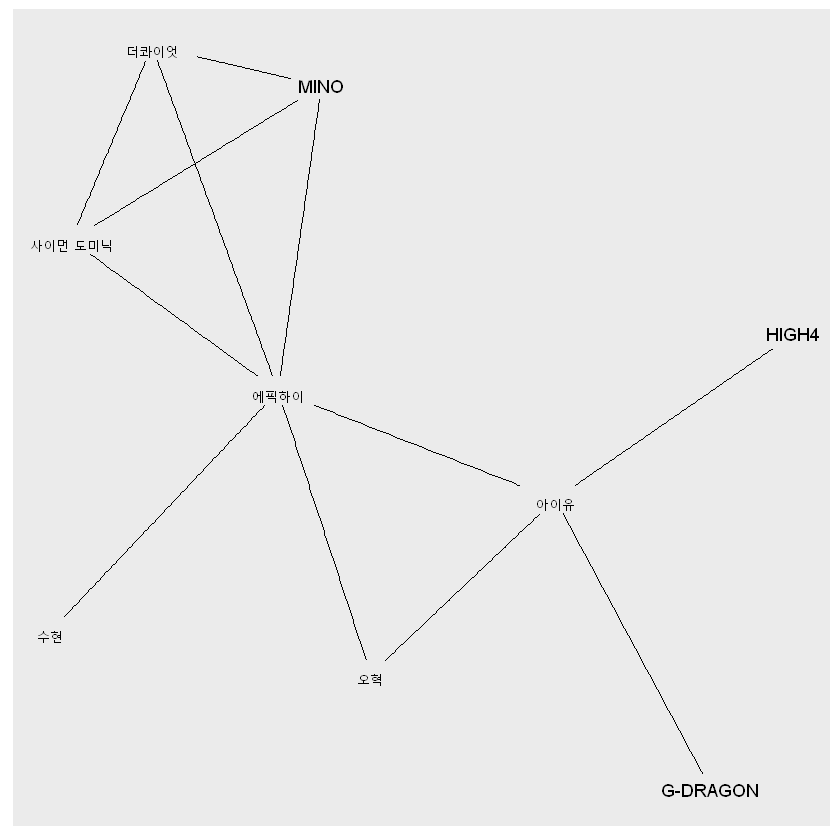

In [8]:
feat %>% 
    as_tbl_graph() %>%
        ggraph(layout='kk') +
            geom_node_text(aes(label=name)) +
            geom_edge_link(aes(start_cap=label_rect(node1.name), 
                               end_cap=label_rect(node2.name)))

###### 자료만 충분하다면 보다 더 큰 사회연결망을 그릴 수 있다.
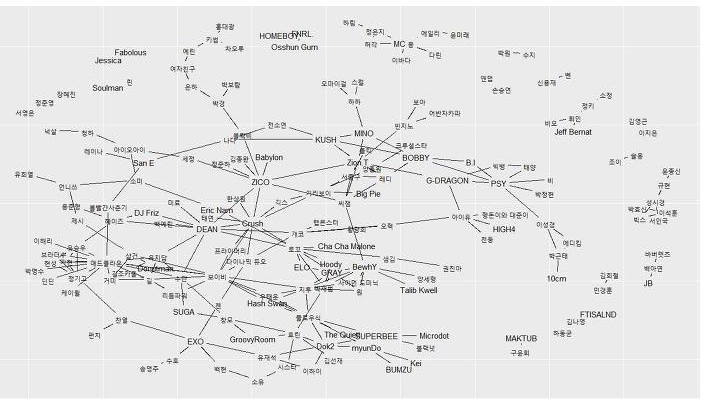